In [2]:
import kaggle
kaggle.api.dataset_download_files(
    dataset="mustafasultan01/icc-mens-t20-world-cup-2024-complete-data", 
    force=True, 
    quiet=False,
    unzip=True, 
    path='./data'
)


Dataset URL: https://www.kaggle.com/datasets/mustafasultan01/icc-mens-t20-world-cup-2024-complete-data


100%|██████████| 29.7k/29.7k [00:00<00:00, 416kB/s]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
batting = pd.read_csv('./data/Batting summaries for every match.csv')
bowling = pd.read_csv('./data/Bowling summaries for every match.csv')
match = pd.read_csv('./data/Match Summary.csv')
player = pd.read_csv('./data/Player_Info T20 WC 2024.csv')


In [6]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        852 non-null    object
 1   teamInnings  852 non-null    object
 2   battingPos   852 non-null    int64 
 3   batsmanName  852 non-null    object
 4   runs         852 non-null    int64 
 5   balls        852 non-null    int64 
 6   4s           852 non-null    int64 
 7   6s           852 non-null    int64 
 8   SR           852 non-null    object
 9   out/not_out  852 non-null    object
 10  Match_Id     852 non-null    object
dtypes: int64(5), object(6)
memory usage: 73.3+ KB


In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Match No.                          52 non-null     object 
 1   Match Date                         52 non-null     object 
 2   Venue                              52 non-null     object 
 3   1st Team                           52 non-null     object 
 4   2nd Team                           52 non-null     object 
 5   Stage                              52 non-null     object 
 6   Toss Winning                       52 non-null     object 
 7   Toss Decision                      52 non-null     object 
 8   First Innings Score                52 non-null     int64  
 9   Fall of wickets First Innings      52 non-null     int64  
 10  Second Innings Score               51 non-null     float64
 11  Fall of wickets Second Innings     51 non-null     float64
 

In [8]:
bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match         595 non-null    object 
 1   bowlingTeam   595 non-null    object 
 2   bowlerName    595 non-null    object 
 3   overs         595 non-null    float64
 4   maiden        595 non-null    int64  
 5   runsConceded  595 non-null    int64  
 6   wickets       595 non-null    int64  
 7   economy       595 non-null    float64
 8   dotBalls      595 non-null    int64  
 9   4s_Conceded   595 non-null    int64  
 10  6s_Conceded   595 non-null    int64  
 11  wides         595 non-null    int64  
 12  noBalls       595 non-null    int64  
 13  Match_Id      595 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 65.2+ KB


In [9]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team           308 non-null    object
 1   name           308 non-null    object
 2   role           308 non-null    object
 3   age            308 non-null    object
 4   batting_style  307 non-null    object
 5   bowling_style  269 non-null    object
dtypes: object(6)
memory usage: 14.6+ KB


# Data Preprocessing

### Handling null values and duplicates

In [10]:
match.isnull().sum()

Match No.                            0
Match Date                           0
Venue                                0
1st Team                             0
2nd Team                             0
Stage                                0
Toss Winning                         0
Toss Decision                        0
First Innings Score                  0
Fall of wickets First Innings        0
Second Innings Score                 1
Fall of wickets Second Innings       1
Winners                              0
Method                               0
Won by                               0
Winning Margin                       1
Top Scorer                           0
Highest Score                        1
Best Bowler                          0
Best Bowler Figure(Wickets Taken)    1
Best Bowler Figure(Runs Recieved)    1
Player Of The Match                  0
Match_Id                             0
dtype: int64

In [11]:
match.duplicated().sum()

0

In [12]:
match.dropna(inplace=True)

In [13]:
# null values in bowling_style, can be retained

player = player[~player['batting_style'].isna()]
player.isna().sum()

team              0
name              0
role              0
age               0
batting_style     0
bowling_style    38
dtype: int64

In [29]:
batting['SR'] =batting['SR'].replace('-', np.nan)
batting['SR']=  pd.to_numeric(batting['SR'])


### Feature Engineering

In [14]:
players = set(player['name'].unique())
teams = set(match['1st Team']).union(set(match['2nd Team']))
print(f'players = {len(players)}')
print(f'teams = {len(teams)}')

players = 307
teams = 20


In [15]:
match['Match Date'] = pd.to_datetime(match['Match Date'])

In [16]:
def preprocess_age(age):
    a = age.split(' ')

    years = int(a[0][:-1])
    days = 0
    if len(a) > 1:
        days = int(a[1][:-1])/365
    

    return years+round(days, 2)

player['age'] = player['age'].apply(preprocess_age)


# EDA


__Team__

1. Number of matches won by each team irrespective of stage
2. Distribution of scores of each team, average score per team
3. Number of times a team won toss and the match and number of times the opposite (toss and winning correlation)
4. Number of times a team won player of match
5. Number of normal matches won by a team and number of dls matches won by the team
6. Probability of winning by runs over probability of winning by wickets
7. Number of average wickets fallen for each team, distribution
8. Average run rate per team
9. Top 5 performing teams
10. Trend of scores of a team across the season
11. Calculate rivalry in season
 

__Players__

1. number of players for each batting style, bowling style, role
2. Average player age for each team
3. Average age for each role, batting style and bowling style
4. metrics across batting format
5. metrics across bowling style

__Batting__

1. Average runs for player in the entire season
2. Number of 6s for player in the entire season
3. Number of 4s for player in the entire season
4. Number of times player got out
5. Average Strike rate of the player in the entire season
6. Number of centuries and half centuries
7. Which players maintained a consistent scores across the season
8. Top Ten Batsmen
9. Trends of batsmen performance across the season



__Bowling__

1. Avg number of overs bowled by a bowler
2. Avg economy rate of each bowler
3. Number of 4s conceded in the entire season, avg number of 4s conceded per match
4. Number of 6s conceded in the entire season, avg number of 6s conceded per match
5. Number of noBalls conceded in the entire season, avg number of noBalls conceded per match
6. Avg number of dotBals per match and Number of dotBalls overall
7. Avg number of maiden overs per match and Number of maiden overs overall
8. Number of wickets taken by bowlers
9. Top ten bowlers
10. Trends of bowler performance across the season


List top 5 exciting matches


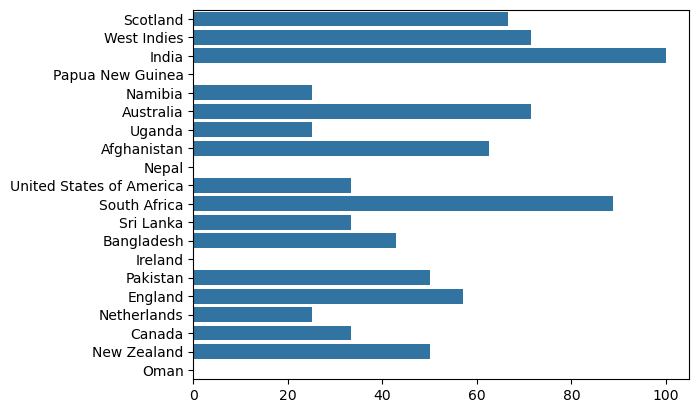

In [17]:

# 1. Number of matches won by each team irrespective of stage

def get_win_percent(team):
    team_matches = match[(match['1st Team'] == team) ^ (match['2nd Team'] == team)]
    won_matches = team_matches[team_matches['Winners'] == team]
    return len(won_matches) * 100 / len(team_matches)

win_percents = []
for team in teams:
    win_percents.append(get_win_percent(team))

sns.barplot(y=list(teams), x=win_percents)
plt.show()

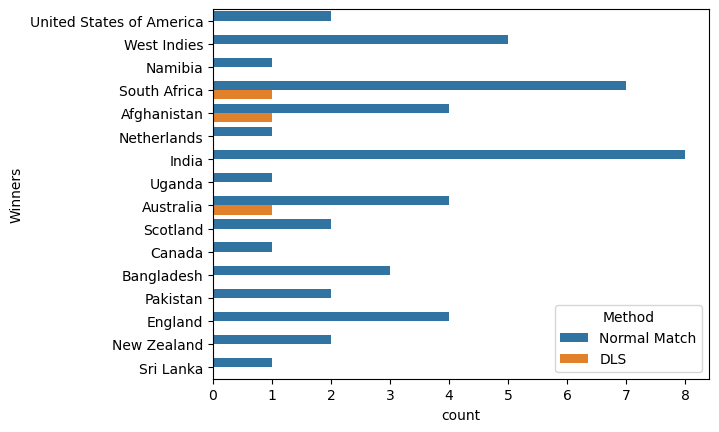

In [18]:
# 5. Number of normal matches won by a team and number of dls matches won by the team

sns.countplot(data=match, y='Winners', hue='Method')
plt.show()

# Method is not that of a relevant attribute

In [19]:
match['SameWins'] = match.apply(lambda x: 1 if x['Winners'] == x['Toss Winning'] else 0, axis=1)

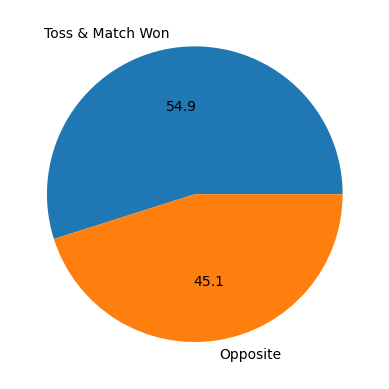

In [20]:

plt.pie(x=match['SameWins'].value_counts().to_numpy(), labels = ['Toss & Match Won', 'Opposite'], autopct=lambda x: str(round(x,2)))
plt.show()

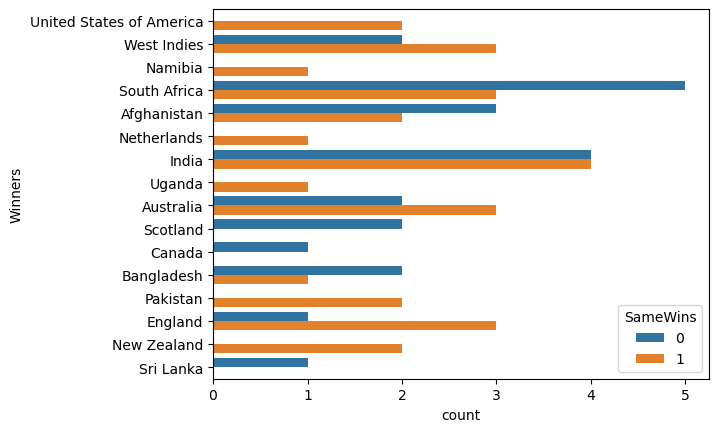

In [21]:
# of all the matches won by a country, how many where the country won the toss
sns.countplot(data=match, y='Winners', hue='SameWins')
plt.show()

In [22]:
# 4. Number of times a team won player of match
def get_pomc(row):
    x = player[player['name'] == row]
    return x['team'].item()

match['PoM Country'] = match['Player Of The Match'].apply(get_pomc)

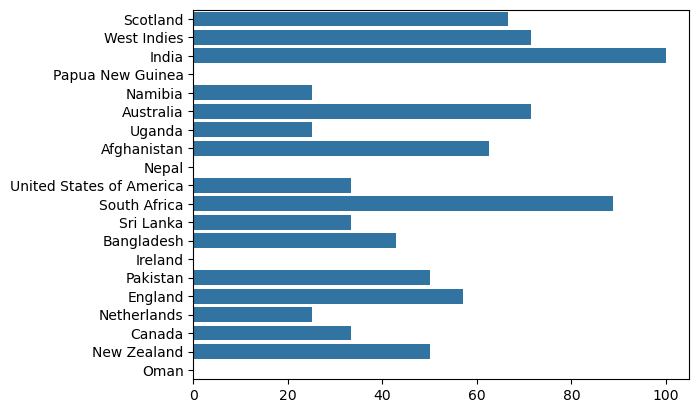

In [23]:
pom_percents = []
for team in list(teams):
    played_matches = match[(match['1st Team'] == team) ^ (match['2nd Team'] == team)]
    pom_matches = played_matches[played_matches['PoM Country'] == team]
    pom_percents.append(len(pom_matches) * 100 / len(played_matches))

sns.barplot(y=list(teams), x=pom_percents)
plt.show()



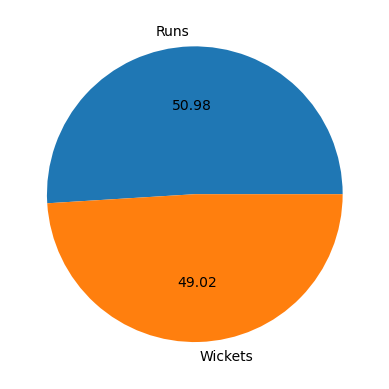

In [24]:
plt.pie(x=match['Won by'].value_counts(), labels=['Runs', 'Wickets'], autopct=lambda x: str(round(x,2)))
plt.show()

# 

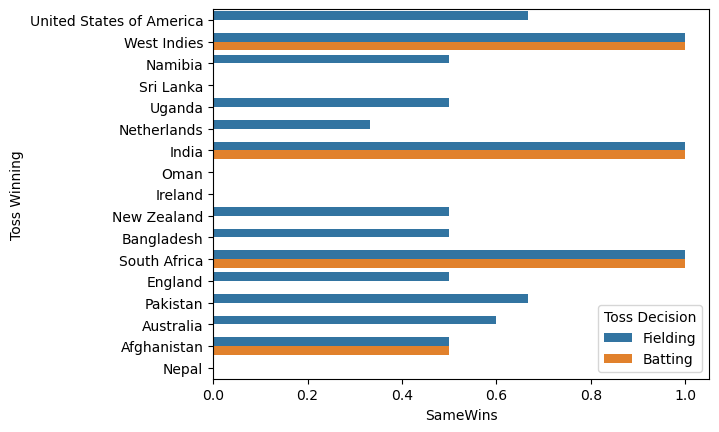

In [25]:
# toss decision
sns.barplot(data=match, y='Toss Winning', x= 'SameWins', hue='Toss Decision', errorbar=None)
plt.show()

# fielding is better choosen over batting

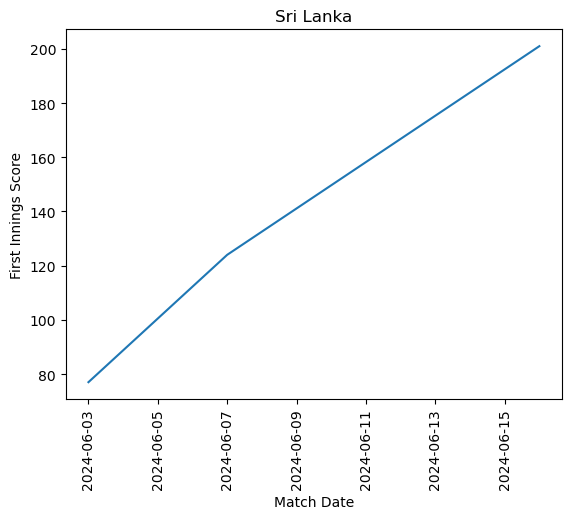

In [26]:
team = list(teams)[11]
team_matches = match[(match['1st Team'] == team) | (match['2nd Team'] == team)]
first_inings = team_matches[((team_matches['Toss Winning'] == team) & (team_matches['Toss Decision'] == 'Batting')) 
             | ((team_matches['Toss Winning'] != team) & (team_matches['Toss Decision'] == 'Fielding'))]
sns.lineplot(x=first_inings['Match Date'],y=first_inings['First Innings Score'])
plt.xticks(rotation=90)
plt.title(team)
plt.show()

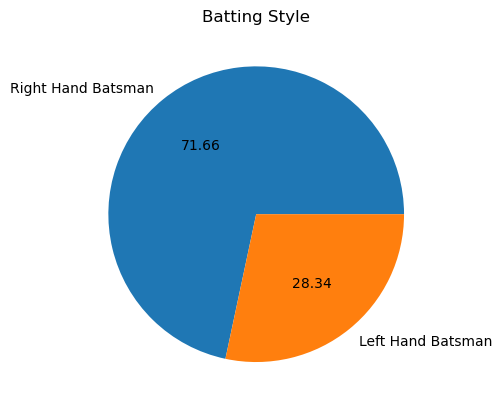

In [27]:
plt.pie(
        x=player['batting_style'].value_counts(), 
        labels=['Right Hand Batsman', 'Left Hand Batsman'], 
        autopct=lambda x: str(round(x, 2))
    )
plt.title('Batting Style')
plt.show()

In [31]:
def get_avg_strike_rate(batting_style):
    rhb = player[player['batting_style'] == batting_style]['name']
    sr = 0
    n = 0
    for batsman in rhb:
        n += len(batting[batting['batsmanName'] ==batsman]['SR'])
        sr = sr + np.sum(batting[batting['batsmanName'] ==batsman]['SR'])

    sr = sr/n
    return sr

batting_style_scores = {}
for bt in player['batting_style'].unique():
   batting_style_scores[bt] = get_avg_strike_rate(bt)

batting_style_scores

{'Right hand Bat': 89.40875415282397, 'Left hand Bat': 87.95852000000004}

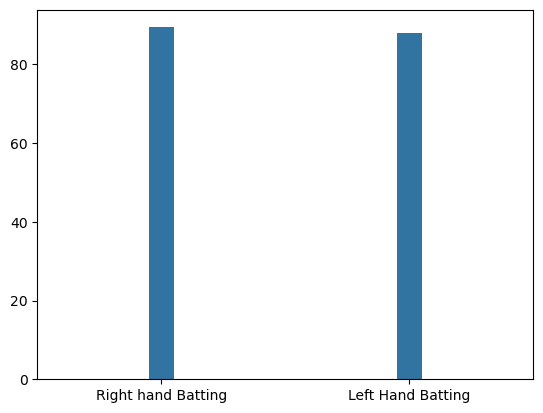

In [33]:

sns.barplot(
    x=['Right hand Batting', 'Left Hand Batting'],
    y=[batting_style_scores['Right hand Bat'], batting_style_scores['Left hand Bat']],
    width=0.1
)

plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1668\4137576461.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


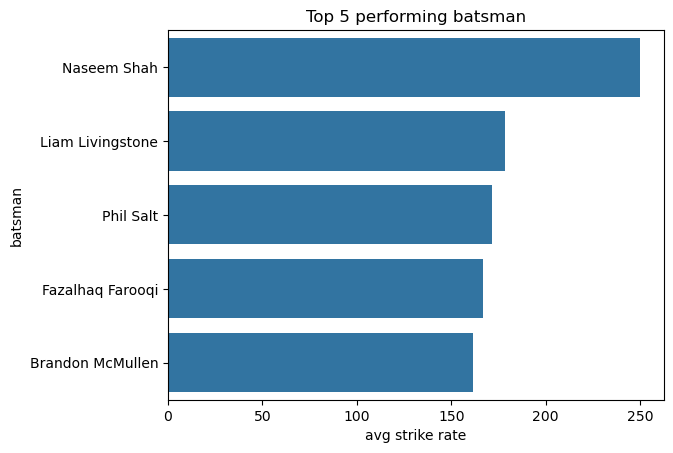

<Figure size 640x480 with 0 Axes>

In [ ]:

top_5_batsmen = batting.groupby(by='batsmanName')['SR'].mean().sort_values(ascending=False)[:5]
sns.barplot(x=top_5_batsmen.values, y=top_5_batsmen.index)
plt.ylabel('batsman')
plt.xlabel('avg strike rate')
plt.title('Top 5 performing batsman')
fig = plt.figure()


In [84]:
# get_batsmen_with_most_centuries
batting.head()

top_5_batsmen_half_centuries=batting[batting['runs'] >= 50]['batsmanName'].value_counts().sort_values(ascending=False)[:5]

In [ ]:
# average runs
# number of 4s
# number of 6s
# average strike rate
# number of times out/not

from scipy.stats import trim_mean


def get_batsman_metrics(name: str):

    fig, axs = plt.subplots(2)
    batsman= batting[batting['batsmanName'] == name]
    
    sns.barplot(x=['avg runs','4s', '6s', 'avg strike rate'], 
                y=[trim_mean(batsman['runs'], proportiontocut=0.25), 
                   batsman['4s'].sum(), 
                   batsman['6s'].sum(),
                   trim_mean(batsman['SR'], proportiontocut=0.25)
                ], ax=axs[0]
                )
    
    sns.countplot(data=batsman, x='out/not_out', ax=axs[1])
    return fig


batting.head()

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,Match_Id
0,India Vs South Africa,India,1,Rohit Sharma,9,5,2,0,180.00,out,T20I # 2729
1,India Vs South Africa,India,2,Virat Kohli,76,59,6,2,128.81,out,T20I # 2729
2,India Vs South Africa,India,3,Rishabh Pant,0,2,0,0,0.00,out,T20I # 2729
3,India Vs South Africa,India,4,Suryakumar Yadav,3,4,0,0,75.00,out,T20I # 2729
4,India Vs South Africa,India,5,Axar Patel,47,31,1,4,151.61,out,T20I # 2729


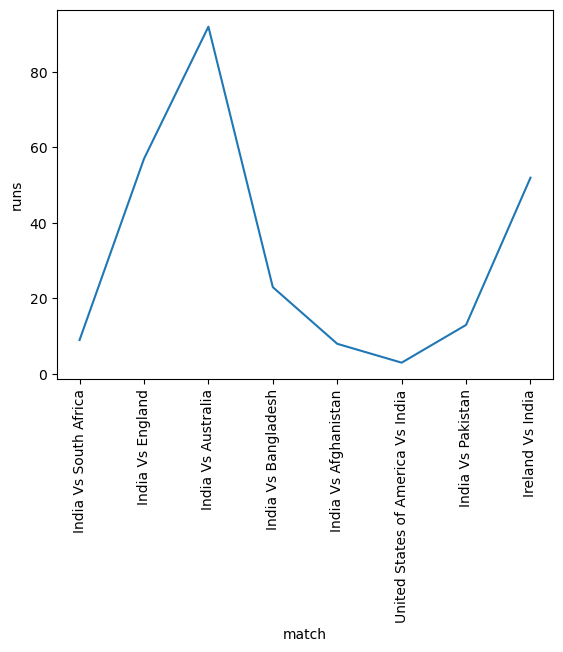

In [ ]:
def get_batsman_trend(name: str):
    fig = plt.figure(figsize=(4,2))
    h = batting[batting['batsmanName'] == str]
    sns.lineplot(data=h, x='match',  y='runs')
    plt.xticks(rotation=90)
    return fig

In [ ]:
# count have to be greater than 5
def get_bowler_metrics(name: str):
    bowler = bowling[bowling['bowlerName'] == name]
    average_econ_rate = trim_mean(bowler['economy'], 0.25)
    average_dot_balls = bowler['dotBalls'].mean()
    avg_4s_concede = bowler['4s_Conceded'].mean()
    avg_6s_concede = bowler['6s_Conceded'].mean()
    avg_maiden = bowler['maiden'].mean()
    total_wickets = bowler['wickets'].sum()
    total_wides = bowler['wides'].sum()
    total_nos = bowler['noBalls'].sum()
    
    return pd.DataFrame({
        "metrics": ['avg econ rate', 
                    'avg dot balls', 
                    'avg 4s conceded', 
                    'avg 6s conceded',
                    'avg maiden overs',
                    'total wickets',
                    'total wides',
                    'total noballs'],
        'values': [average_econ_rate, average_dot_balls, 
                   avg_4s_concede, 
                   avg_6s_concede, 
                   avg_maiden, total_wickets ,total_wides, total_nos]
    })



In [125]:
def get_top_5_bowlers():
    top_5 = bowling.groupby(by=['bowlerName', 'bowlingTeam'])['economy'].apply(lambda x: trim_mean(x, 0.25)).sort_values(ascending=True)[:5]
    fig = plt.figure(figsize=(6,4))
    sns.barplot(y=top_5.index.map(lambda x: x[0] + "-" + x[1]), x=top_5.values)
    plt.ylabel('bowler')
    plt.xlabel('economy rate')
    plt.title('Top 5 bowlers as per economy rate')
    return fig


In [ ]:
def get_bowler_trend(name: str):
    bowler = bowling[bowling['bowlerName'] == name]
    fig = plt.figure()
    sns.lineplot(x=bowler['match'],y=bowler['runsConceded'])
    fig.suptitle(f'Bowler Name = {bowler}, Team = {bowler['bowlingTeam']}')
    return fig




In [ ]:
bowling['name'] = bowling['bowlerName']
mergeddf = pd.merge(player, bowling,on = 'name', how='inner')
top_5_bowling_styles = mergeddf.groupby(by='bowling_style')['runsConceded'].apply(lambda x: trim_mean(x, 0.25)).sort_values(ascending=False)[:5]


bowling_style
Left arm Fast                          25.777778
Right arm Offbreak, Legbreak Googly    25.333333
Right arm Fast medium                  24.709677
Left arm Medium                        24.200000
Left arm Medium fast                   24.058824
Name: runsConceded, dtype: float64

In [ ]:
match['First Innings Score']

Match No.                                                      1st
Match Date                                     2024-06-01 00:00:00
Venue                                Grand Prairie Stadium, Dallas
1st Team                                                    Canada
2nd Team                                  United States of America
Stage                                                      Group A
Toss Winning                              United States of America
Toss Decision                                             Fielding
First Innings Score                                            194
Fall of wickets First Innings                                    5
Second Innings Score                                         197.0
Fall of wickets Second Innings                                 3.0
Winners                                   United States of America
Method                                                Normal Match
Won by                                                     Wic